# Batch Processing

In [1]:
from nhsmass.spectrum import Spectrum
from nhsmass.spectra import SpectrumList
import nhsmass.draw as draw
import pandas as pd
import matplotlib.pyplot as plt
import os

## Load spectra

We can load separate Spectrum, treat them and then join it in SpectrumList object which is a list of spectra 

In [2]:
specs = SpectrumList()
for filename in sorted(os.listdir("data/similarity/")):
    if filename[-3:] != 'csv':
        continue
    spec = Spectrum.read_csv(f"data/similarity/{filename}", assign_mark=True)
    specs.append(spec)

specs.get_names()

['a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_6']

Or directly load from folder if specs already treated 

In [3]:
specs = SpectrumList.read_csv('data/similarity/')
specs.get_names()

['a_4', 'a_5', 'a_6', 'a_2', 'a_3', 'a_1']

## Calculate simmilarity index and plot matrix

Calculate simmilarity indexes. For now it common indexes - Cosine, Tanimoto and Jaccard

In [4]:
specs.get_simmilarity(mode='cosine')

array([[1.        , 0.63921734, 0.55387418, 0.22893115, 0.12221844,
        0.24206235],
       [0.63921734, 1.        , 0.46713676, 0.11426236, 0.04536192,
        0.13553428],
       [0.55387418, 0.46713676, 1.        , 0.3297159 , 0.12996979,
        0.33440804],
       [0.22893115, 0.11426236, 0.3297159 , 1.        , 0.27330141,
        0.59910651],
       [0.12221844, 0.04536192, 0.12996979, 0.27330141, 1.        ,
        0.0912144 ],
       [0.24206235, 0.13553428, 0.33440804, 0.59910651, 0.0912144 ,
        1.        ]])

And plot matrix

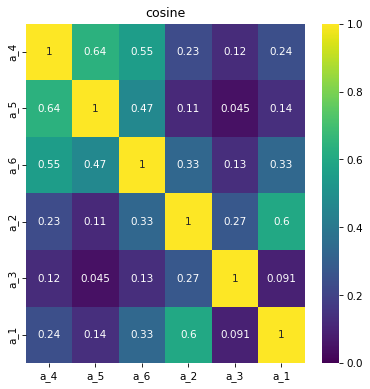

In [5]:
specs.draw_simmilarity(mode='cosine')

## Calculate metrics

From spectra we can get molecular metrics

In [6]:
specs.get_mol_metrics()

,a_4,a_5,a_6,a_2,a_3,a_1
AI,-0.079344,-0.037731,-0.307631,0.444909,0.613860,0.171642
C,21.476279,21.143970,17.786572,22.186035,23.129087,17.967260
CAI,9.251700,8.712936,9.954005,15.300819,16.397214,12.064931
CRAM,0.552194,0.540266,0.485958,0.090364,0.035393,0.204550
DBE,12.644497,12.636119,8.106037,13.660797,16.722827,8.526630
DBE-O,0.806469,0.492241,0.560464,7.055005,10.396550,2.820194
DBE-OC,0.033105,0.017236,0.017788,0.298224,0.447654,0.118010
DBE_AI,0.419919,0.205085,0.273470,6.775581,9.990954,2.624301
H,20.004788,19.264393,21.578437,19.305284,15.211308,21.029147
H/C,0.941654,0.924041,1.220249,0.918817,0.655002,1.261374


Get molecular class density and plot bar

,a_4,a_5,a_6,a_2,a_3,a_1
unsat_lowOC,0.201447,0.183535,0.408356,0.195555,0.147491,0.196795
unsat_highOC,0.654447,0.716404,0.217642,0.006134,0.004349,0.080142
condensed_lowOC,0.026479,0.005946,0.028384,0.256306,0.441213,0.118184
condensed_highOC,0.002802,0.000989,0.000662,0.001651,0.002156,0.002919
aromatic_lowOC,0.028453,0.013982,0.044924,0.290728,0.336764,0.138210
aromatic_highOC,0.015343,0.011668,0.005026,0.014576,0.014677,0.016288
aliphatics,0.014729,0.023744,0.155616,0.005297,0.000097,0.045678
lipids,0.028270,0.022411,0.101287,0.186821,0.018383,0.369506
N-satureted,0.003950,0.000688,0.016474,0.005117,0.000000,0.006827
undefinded,0.024080,0.020633,0.021629,0.037814,0.034871,0.025451


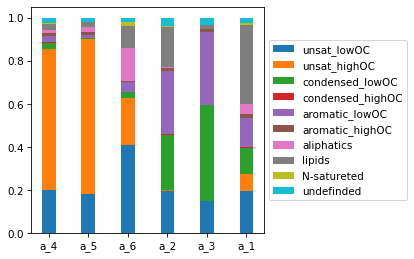

In [7]:
specs.draw_mol_density()
specs.get_mol_density()

Also we can calculate density of squares of Van Krevelen diagram

In [8]:
specs.get_square_vk()

,a_4,a_5,a_6,a_2,a_3,a_1
1,0.008942,0.004066,0.014149,0.046670,0.178541,0.009918
2,0.002034,0.001793,0.012627,0.033494,0.149713,0.005776
3,0.000819,0.000160,0.010486,0.046734,0.061893,0.010208
4,0.023089,0.017808,0.038597,0.041165,0.023237,0.069177
5,0.005045,0.003707,0.044065,0.153976,0.004767,0.293159
6,0.028251,0.009248,0.023760,0.356841,0.348926,0.188009
7,0.070833,0.049838,0.102810,0.199036,0.165541,0.093670
8,0.087435,0.083649,0.225485,0.060352,0.023909,0.103503
9,0.015644,0.021632,0.129569,0.008620,0.001865,0.045593
10,0.002791,0.006214,0.034856,0.006054,0.000000,0.027571


## SpectrumList is a list

With SpectrumList object we can work as with list, for example, plot spectrum

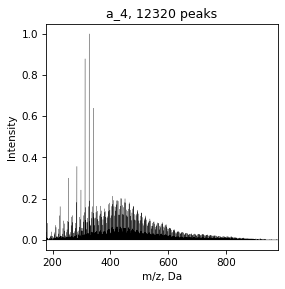

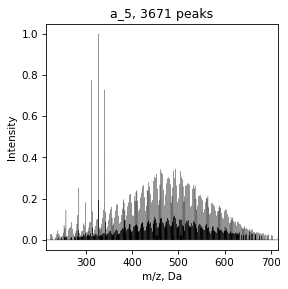

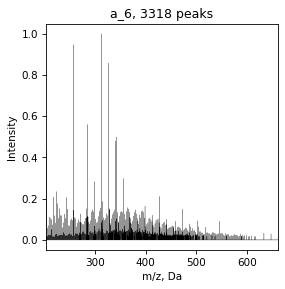

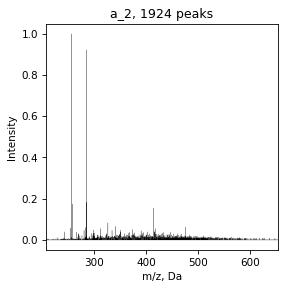

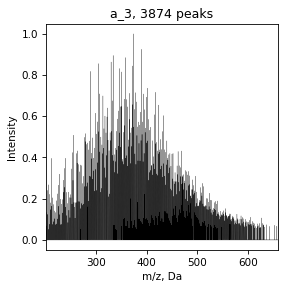

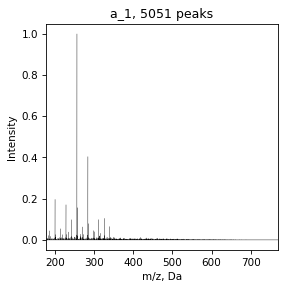

In [9]:
for spec in specs:
    draw.spectrum(spec)

And save all data in folder

In [10]:
if 'temp' not in os.listdir():
    os.mkdir('temp')

specs.to_csv('temp')